# IPSL Scarious

This notebook pertains to loading in all of the SSP scenerious and geting the yearly average temperature anomalies and then plotting these values. 

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import warnings 
import warnings
warnings.filterwarnings('ignore')

# Data Load

<b> Historical data

In [4]:
ROOT_DIR_HIST = '/g/data/oi10/replicas/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/day/tas/gr/v20190614/'
hist = xr.open_dataset(ROOT_DIR_HIST + 'tas_day_IPSL-CM6A-LR_historical_r1i1p1f1_gr_18500101-20141231.nc'
                      , chunks = {'lat':100,'lon':100}, use_cftime = True)

In [5]:
hist

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, lat: 143, lon: 144, time: 60265)
Coordinates:
  * lat          (lat) float32 -90.0 -88.73 -87.46 -86.2 ... 87.46 88.73 90.0
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    height       float64 ...
  * time         (time) object 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) object dask.array<chunksize=(60265, 2), meta=np.ndarray>
    tas          (time, lat, lon) float32 dask.array<chunksize=(60265, 100, 100), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-07-11T07:27:15Z
    description:            CMIP6 historical
    title:                  IPSL-CM6A-LR model output prepared for CMIP6 / CM...
    activity_id:            CMIP
    contact:                ipsl-cmip6@listes.ipsl.fr
    data_specs_version:     01.00.21
    dr2xml_version:         1.11
    experiment_id:          historical
    experiment:             all-forcing simulation of the recent past
    external_variables:     areacella
    forcing_index:          1
    frequency:              day
    grid:                   LMDZ grid
    grid_label:             gr
    nominal_resolution:     250 km
    initialization_index:   1
    institution_id:         IPSL
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    license:                CMIP6 model data produced by IPSL is licensed und...
    mip_era:                CMIP6
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_activity_id:     CMIP
    parent_source_id:       IPSL-CM6A-LR
    parent_time_units:      days since 1850-01-01 00:00:00
    branch_method:          standard
    branch_time_in_parent:  21914.0
    branch_time_in_child:   0.0
    physics_index:          1
    product:                model-output
    realm:                  atmos
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    source_id:              IPSL-CM6A-LR
    source_type:            AOGCM BGC
    sub_experiment_id:      none
    sub_experiment:         none
    table_id:               day
    variable_id:            tas
    EXPID:                  historical
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          f1e40c1fc5d8281f865f72fbf4e38f9d
    model_version:          6.1.5
    parent_variant_label:   r1i1p1f1
    name:                   /ccc/work/cont003/gencmip6/p86caub/IGCM_OUT/IPSLC...
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    variant_label:          r1i1p1f1
    realization_index:      1
    history:                Sat Dec  1 12:16:19 2018: ncatted -O -a realizati...
    NCO:                    "4.6.0"
    tracking_id:            hdl:21.14100/f03b9aba-9925-473a-b80a-522b166ed113

<b> Loading all SPP scenarious <b/>

All the different SPP scenarious

In [11]:
import os
ROOT_DIR = '/g/data/oi10/replicas/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/'
ssp_scenarios = os.listdir(ROOT_DIR)
ssp_scenarios

['ssp460',
 'ssp585',
 'ssp126',
 'ssp119',
 'ssp534-over',
 'ssp245',
 'ssp434',
 'ssp370']

Bash list of all the files

Daily Datasets

In [12]:
%%bash
echo '-------- ssp119'
ls /g/data/oi10/replicas/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp119/r1i1p1f1/day/tasmax/gr/v20190614


-------- ssp119
tasmax_day_IPSL-CM6A-LR_ssp119_r1i1p1f1_gr_20150101-21001231.nc


In [13]:
%%bash
ls /g/data/oi10/replicas/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp460/r14i1p1f1

Amon
Emon
fx
Lmon
Ofx
Omon


In [14]:
available_scenrarios = []
scenario_files = []

for scenario in ssp_scenarios:
    SUB_DIR = '/g/data/oi10/replicas/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/{}/r1i1p1f1/day/tasmax/gr/'.\
    format(scenario)
    
    try:
        SCEN_DIR = SUB_DIR + os.listdir(SUB_DIR)[0]
        files = os.listdir(SCEN_DIR)
        
        
        available_scenrarios.append(scenario)
        scenario_files.append(len(files))
        print(scenario + ' -------- {} files'.format(len(files)))
        for file in files:
            print(file)
    except:
        print(scenario + ' --------')
        print('Not available for this scenario')
        
print('\nSummary: Daily data is available for the following scenerios')      
for scenario, length in zip(available_scenrarios, scenario_files):
    print(scenario, length, sep = ' : ')

ssp460 --------
Not available for this scenario
ssp585 -------- 2 files
tasmax_day_IPSL-CM6A-LR_ssp585_r1i1p1f1_gr_21010101-23001231.nc
tasmax_day_IPSL-CM6A-LR_ssp585_r1i1p1f1_gr_20150101-21001231.nc
ssp126 -------- 2 files
tasmax_day_IPSL-CM6A-LR_ssp126_r1i1p1f1_gr_21010101-23001231.nc
tasmax_day_IPSL-CM6A-LR_ssp126_r1i1p1f1_gr_20150101-21001231.nc
ssp119 -------- 1 files
tasmax_day_IPSL-CM6A-LR_ssp119_r1i1p1f1_gr_20150101-21001231.nc
ssp534-over --------
Not available for this scenario
ssp245 -------- 1 files
tasmax_day_IPSL-CM6A-LR_ssp245_r1i1p1f1_gr_20150101-21001231.nc
ssp434 --------
Not available for this scenario
ssp370 -------- 1 files
tasmax_day_IPSL-CM6A-LR_ssp370_r1i1p1f1_gr_20150101-21001231.nc

Summary: Daily data is available for the following scenerios
ssp585 : 2
ssp126 : 2
ssp119 : 1
ssp245 : 1
ssp370 : 1


Monthly datasets

In [15]:
for scenario in ssp_scenarios:
    SUB_DIR = '/g/data/oi10/replicas/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/{}/r1i1p1f1/Amon/tas/gr/'.\
    format(scenario)
    
    SCEN_DIR = SUB_DIR + os.listdir(SUB_DIR)[0]
    files = os.listdir(SCEN_DIR)
    print(scenario + ' -------- {} files'.format(len(files)))
    for file in files:
        print(file)

ssp460 -------- 1 files
tas_Amon_IPSL-CM6A-LR_ssp460_r1i1p1f1_gr_201501-210012.nc
ssp585 -------- 2 files
tas_Amon_IPSL-CM6A-LR_ssp585_r1i1p1f1_gr_210101-230012.nc
tas_Amon_IPSL-CM6A-LR_ssp585_r1i1p1f1_gr_201501-210012.nc
ssp126 -------- 2 files
tas_Amon_IPSL-CM6A-LR_ssp126_r1i1p1f1_gr_210101-230012.nc
tas_Amon_IPSL-CM6A-LR_ssp126_r1i1p1f1_gr_201501-210012.nc
ssp119 -------- 1 files
tas_Amon_IPSL-CM6A-LR_ssp119_r1i1p1f1_gr_201501-210012.nc
ssp534-over -------- 2 files
tas_Amon_IPSL-CM6A-LR_ssp534-over_r1i1p1f1_gr_204001-210012.nc
tas_Amon_IPSL-CM6A-LR_ssp534-over_r1i1p1f1_gr_210101-230012.nc
ssp245 -------- 1 files
tas_Amon_IPSL-CM6A-LR_ssp245_r1i1p1f1_gr_201501-210012.nc
ssp434 -------- 1 files
tas_Amon_IPSL-CM6A-LR_ssp434_r1i1p1f1_gr_201501-210012.nc
ssp370 -------- 1 files
tas_Amon_IPSL-CM6A-LR_ssp370_r1i1p1f1_gr_201501-210012.nc


In [16]:
%%bash
ls /g/data/oi10/replicas/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR
echo '-------- ssp119'
ls /g/data/oi10/replicas/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp119/r1i1p1f1/Amon/tas/gr/v20190410
echo '---b----- ssp126'
ls /g/data/oi10/replicas/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp126/r1i1p1f1/Amon/tas/gr/v20190903
echo '-------- ssp245'
ls /g/data/oi10/replicas/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp245/r1i1p1f1/Amon/tas/gr/v20190119
echo '-------- ssp434'
ls /g/data/oi10/replicas/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp434/r1i1p1f1/Amon/tas/gr/v20190506
echo '-------- ssp460'
ls /g/data/oi10/replicas/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp460/r1i1p1f1/Amon/tas/gr/v20190506
echo '-------- ssp534-over'
ls /g/data/oi10/replicas/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp534-over/r1i1p1f1/Amon/tas/gr/v20190909
echo '-------- ssp585'
ls /g/data/oi10/replicas/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp585/r1i1p1f1/Amon/tas/gr/v20190903


ssp119
ssp126
ssp245
ssp370
ssp434
ssp460
ssp534-over
ssp585
-------- ssp119
tas_Amon_IPSL-CM6A-LR_ssp119_r1i1p1f1_gr_201501-210012.nc
---b----- ssp126
tas_Amon_IPSL-CM6A-LR_ssp126_r1i1p1f1_gr_201501-210012.nc
tas_Amon_IPSL-CM6A-LR_ssp126_r1i1p1f1_gr_210101-230012.nc
-------- ssp245
tas_Amon_IPSL-CM6A-LR_ssp245_r1i1p1f1_gr_201501-210012.nc
-------- ssp434
tas_Amon_IPSL-CM6A-LR_ssp434_r1i1p1f1_gr_201501-210012.nc
-------- ssp460
tas_Amon_IPSL-CM6A-LR_ssp460_r1i1p1f1_gr_201501-210012.nc
-------- ssp534-over
tas_Amon_IPSL-CM6A-LR_ssp534-over_r1i1p1f1_gr_204001-210012.nc
tas_Amon_IPSL-CM6A-LR_ssp534-over_r1i1p1f1_gr_210101-230012.nc
-------- ssp585
tas_Amon_IPSL-CM6A-LR_ssp585_r1i1p1f1_gr_201501-210012.nc
tas_Amon_IPSL-CM6A-LR_ssp585_r1i1p1f1_gr_210101-230012.nc


Loadsing all the differnet ssp scenario data into a dicionary with the format '\<scenario name\>' : \<data>

!Note: xr.ope_mfdataset can not be used for the following due to some directories containing two datasets whilst others contain one.
```xr.open_mfdataset('/g/data/oi10/replicas/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/*/r1i1p1f1/Amon/tas/gr/*/*.nc')```

In [17]:
debug = 0

data_stor = {}
for scenario in ssp_scenarios:
    SUB_DIR = '/g/data/oi10/replicas/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/{}/r1i1p1f1/Amon/tas/gr/'.\
    format(scenario)
    
    SCEN_DIR = SUB_DIR + os.listdir(SUB_DIR)[0]
    files = os.listdir(SCEN_DIR)
    
    # Printing out the full list of what is occuring
    if debug:
        print(SCEN_DIR)
        print(files, sep = '\n')
        print(len(files))
        print('------')
    
    # Certain scerious contain either one data set (run to 2100) or two data sets (runs to 2300).
    # If there is only data set we can open this plainly.
    if len(files) > 1:
        df  = xr.open_mfdataset(SCEN_DIR + '/*.nc', use_cftime = True, 
                                chunks = {'lat':100,'lon':100})
    # If there are two, we can employ a mutilfile merge to get them into the one dataset.
    else:
        df = xr.open_dataset(SCEN_DIR + '/{}'.format(files[0]), use_cftime = True, 
                             chunks = {'lat':100,'lon':100})
    
    print('{} has been loaded ({} files)'.format(scenario, len(files)))
    
    data_stor[scenario] = df

ssp460 has been loaded (1 files)
ssp585 has been loaded (2 files)
ssp126 has been loaded (2 files)
ssp119 has been loaded (1 files)
ssp534-over has been loaded (2 files)
ssp245 has been loaded (1 files)
ssp434 has been loaded (1 files)
ssp370 has been loaded (1 files)


*Note: Merging with all of these datasets does currenlty not work with the chunking. Perhaps they amy be able to merge in the future. However, currenlty they output will be kept in dictionary form until better solution can be found. <br> Merge code: xr.concat(data_stor.values(), pd.Index(data_stor.keys()))

In [18]:
IPSL = xr.concat(data_stor.values(), pd.Index( data_stor.keys(), name = 'scenario'))\
            .chunk({'lat':100,'lon':100})
IPSL

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, lat: 143, lon: 144, scenario: 8, time: 3432)
Coordinates:
  * time         (time) object 2015-01-16 12:00:00 ... 2300-12-16 12:00:00
  * lat          (lat) float32 -90.0 -88.73 -87.46 -86.2 ... 87.46 88.73 90.0
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    height       float64 2.0
  * scenario     (scenario) object 'ssp460' 'ssp585' ... 'ssp434' 'ssp370'
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (scenario, time, axis_nbounds) object dask.array<chunksize=(1, 1032, 2), meta=np.ndarray>
    tas          (scenario, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 100, 100), meta=np.ndarray>
Attributes:
    name:                   /ccc/work/cont003/gencmip6/lurtont/IGCM_OUT/IPSLC...
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2019-04-10T06:43:43Z
    tracking_id:            hdl:21.14100/3b7212e9-b7cf-4170-9c1f-932c27c60b60
    description:            Future scenario with medium radiative forcing by ...
    title:                  IPSL-CM6A-LR model output prepared for CMIP6 / Sc...
    activity_id:            ScenarioMIP
    contact:                ipsl-cmip6@listes.ipsl.fr
    data_specs_version:     01.00.28
    dr2xml_version:         1.16
    experiment_id:          ssp460
    experiment:             update of RCP6.0 based on SSP4
    external_variables:     areacella
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    grid:                   LMDZ grid
    grid_label:             gr
    nominal_resolution:     250 km
    history:                none
    initialization_index:   1
    institution_id:         IPSL
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    license:                CMIP6 model data produced by IPSL is licensed und...
    mip_era:                CMIP6
    parent_mip_era:         CMIP6
    parent_source_id:       IPSL-CM6A-LR
    parent_time_units:      days since 1850-01-01 00:00:00
    parent_variant_label:   r1i1p1f1
    branch_method:          standard
    branch_time_in_parent:  60265.0
    branch_time_in_child:   0.0
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  atmos
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    source_id:              IPSL-CM6A-LR
    source_type:            AOGCM BGC
    sub_experiment_id:      none
    sub_experiment:         none
    table_id:               Amon
    variable_id:            tas
    variant_info:           Each member starts from the corresponding member ...
    variant_label:          r1i1p1f1
    EXPID:                  ssp460
    CMIP6_CV_version:       cv=6.2.15.1
    dr2xml_md5sum:          b6f602401512e82e2d7cadc2c6f36c2a
    model_version:          6.1.9
    parent_experiment_id:   historical
    parent_activity_id:     CMIP

# Calculating Anomalies

<b> Climatology </b>

Calculating the climatology based upon the 1850 to 1900 average.

In [19]:
hist_y_mean = hist.resample(time = 'Y').mean()
hist_y_mean 

<xarray.Dataset>
Dimensions:  (lat: 143, lon: 144, time: 165)
Coordinates:
  * time     (time) object 1850-12-31 00:00:00 ... 2014-12-31 00:00:00
  * lat      (lat) float32 -90.0 -88.73 -87.46 -86.2 ... 86.2 87.46 88.73 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    height   float64 ...
Data variables:
    tas      (time, lat, lon) float32 dask.array<chunksize=(1, 100, 100), meta=np.ndarray>

In [20]:
climatology = hist.where(hist.time.dt.year.isin(np.arange(1850,1901)) , drop = True)\
                    .mean(dim = ['lat','lon','time'])
climatology 

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    height   float64 2.0
Data variables:
    tas      float32 dask.array<chunksize=(), meta=np.ndarray>

In [21]:
# Mean of each year for ISPL data.
IPSL_resample = IPSL.resample(time = 'Y').mean()
# Mean of all lat and lon.
IPSL_resample_mean = IPSL_resample.mean(dim = ['lat','lon'])
# Subtracting the climatology, so that we are now dealing with anomlaies.
# Data is also rechunked so that it can work with the folling (chucks will otherwise be 1 and
# rolling doens't like that).
IPSL_anom = (IPSL_resample_mean - climatology).chunk({'time':10})

In [22]:
# Rolling mean to smooth the data. min_periods = 2 so that it will work with end points.
IPSL_anom_roll = IPSL_anom.rolling(time = 5 , min_periods = 1 , center = False).mean(dim = 'time')

In [23]:
hist_anom = hist_y_mean.mean(dim = ['lat','lon']) - climatology

All the datsets that have been created are small, so can now be loaded into memoery.

In [24]:
hist_anom = hist_anom.load()

In [25]:
IPSL_anom_roll = IPSL_anom_roll.load()
IPSL_anom = IPSL_anom.load()

In [26]:
hist_anom

<xarray.Dataset>
Dimensions:  (time: 165)
Coordinates:
  * time     (time) object 1850-12-31 00:00:00 ... 2014-12-31 00:00:00
    height   float64 2.0
Data variables:
    tas      (time) float32 -0.2361 -0.103 -0.03427 ... 1.688 1.609 1.495

# Plotting

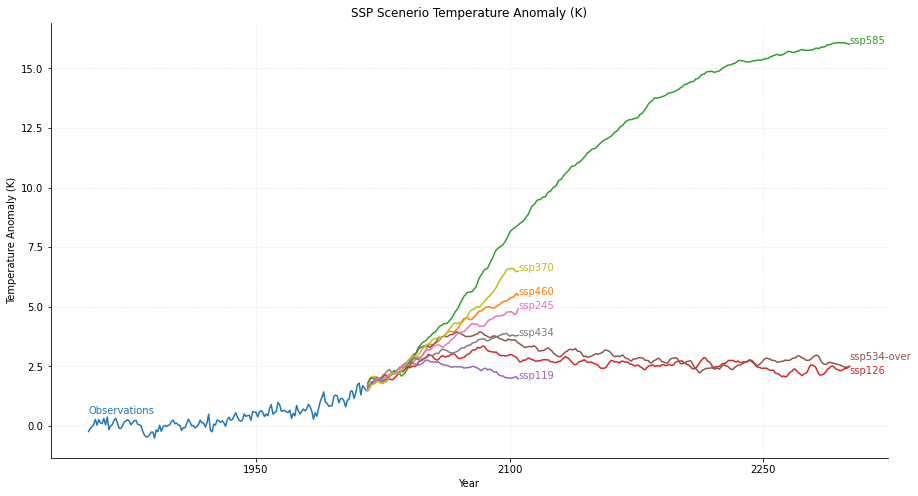

In [27]:
fig, ax = plt.subplots(figsize = (15,8))
data = IPSL_anom_roll.tas

ax.plot(hist_anom.time.values, hist_anom.tas.values)

ax.annotate('Observations', xy = (hist_anom.time.values[0], 0.5), 
                        color = plt.gca().lines[0].get_color())
for i,scenario in enumerate(data.scenario.values):
    
    time = data.sel(scenario = scenario).time.values
    temp = data.sel(scenario = scenario).values
    line = ax.plot(time, temp)
    
    x = time[np.isfinite(temp)][-1]
    y = temp[np.isfinite(temp)][-1]
    
    deltay = 0
    if scenario == 'ssp534-over':
        deltay = .3
    elif scenario == 'ssp126':
        deltay = -.3
        
    
    line_color = plt.gca().lines[i + 1].get_color()
    ax.annotate(scenario, xy = (x,y + deltay), color = line_color)
    
ax.set_title('SSP Scenerio Temperature Anomaly (K)');

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Year')
ax.set_ylabel('Temperature Anomaly (K)')

ax.grid(alpha = 0.4, linestyle = ':')


fig.savefig('../../images/PhD/init/temp_anomly_line.png', bbox_inches = 'tight', dpi = 300)

# Warming stripes

Sourced from
https://matplotlib.org/matplotblog/posts/warming-stripes/

In [32]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import ListedColormap
import pandas as pd
import matplotlib

In [33]:
cmap = ListedColormap([
    '#08306b', '#08519c', '#2171b5', '#4292c6',
    '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
    '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
    '#ef3b2c', '#cb181d', '#a50f15', '#67000d',
])

In [34]:
color_list = [
    '#08306b', '#08519c', '#2171b5', '#4292c6',
    '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
    '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
    '#ef3b2c', '#cb181d', '#a50f15', '#67000d',
]
cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list('cmap',color_list, N = 256)

In [35]:
def plot_warming_stripes(data, vmin = None, vmax = None):
    fig = plt.figure(figsize = (10, 1))

    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_axis_off()

    FIRST = 0
    LAST = len(data)
    col = PatchCollection([
        Rectangle((y, 0), 1, 1)
        for y in range(FIRST, LAST + 1)
    ])

    # set data, colormap and color limits
    col.set_array(data)
    col.set_cmap(cmap2)
    
    
    if not vmax:
        vmax = np.max(np.abs(data))
        
    if not vmin:
        vmin = -vmax
    
    if vmin == 'min':
        vmin = np.min(data)
    
    col.set_clim(vmin, vmax)
    ax.add_collection(col)

    ax.set_ylim(0, 1)
    ax.set_xlim(FIRST, LAST)
    
    return ax

In [36]:
IPSL_anom.scenario.values

array(['ssp460', 'ssp585', 'ssp126', 'ssp119', 'ssp534-over', 'ssp245',
       'ssp434', 'ssp370'], dtype=object)

In [37]:
hist_vals = hist_anom.where(~hist_anom.time.dt.year.isin(np.arange(1850,1901)), drop = True).tas.values

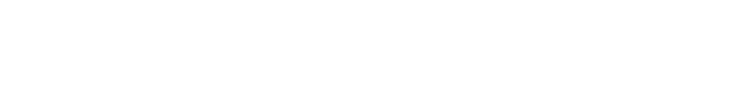

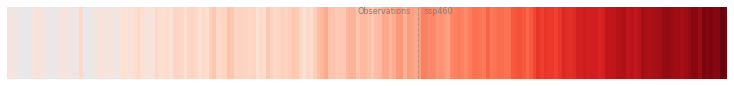

In [42]:
scenario = 'ssp460'



fig = plt.figure(figsize=(10, 1))

ax = fig.add_axes([0, 0, 1, 1])
ax.set_axis_off()

data = np.concatenate([hist_vals,
                       IPSL_anom.sel(scenario = scenario).dropna(dim = 'time').tas.values
                      ])
ax = plot_warming_stripes(data)

ax.plot([len(hist_vals), len(hist_vals)],[0,1], color = 'grey', linewidth = '1', 
        linestyle = '--', alpha = 0.5)

ax.annotate('Observations', xy =(len(hist_vals) - 2, 0.9), clip_on = True, size  = 8, ha = 'right'
           ,color = 'grey');
ax.annotate(scenario, xy =(len(hist_vals) + 2, 0.9), clip_on = True, size  = 8, ha = 'left'
           ,color = 'grey');

fig.savefig(f'../../images/PhD/init/warming_strips{scenario}.png', dpi = 300)
# hist_square = Rectangle((0,0), len(hist_vals),1, edgecolor = 'k', facecolor = None, alpha = 0.5
#                        ,linewidth = 2)
# ax.add_artist(hist_square)

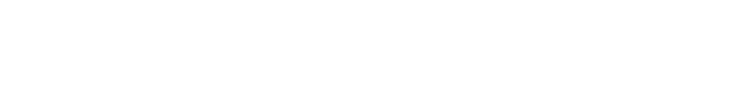

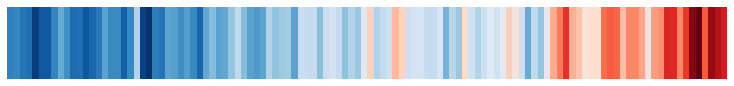

In [43]:
fig = plt.figure(figsize=(10, 1))

ax = fig.add_axes([0, 0, 1, 1])
ax.set_axis_off()


plot_warming_stripes(
    hist_anom.where(~hist_anom.time.dt.year.isin(np.arange(1850,1901)), drop = True).tas.values
                     , vmin = 'min')

fig.savefig(f'../../images/PhD/init/warming_strips_obs.png', dpi = 300)


# Calculating Anomalies - Dictionary (Defunct)

<b> Climatology </b>

Calculating the climatology based upon the 1850 to 1900 average.

In [249]:
hist_y_mean = hist.resample(time = 'Y').mean()
hist_y_mean 

<xarray.Dataset>
Dimensions:  (lat: 143, lon: 144, time: 165)
Coordinates:
  * time     (time) datetime64[ns] 1850-12-31 1851-12-31 ... 2014-12-31
  * lat      (lat) float32 -90.0 -88.73 -87.46 -86.2 ... 86.2 87.46 88.73 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    height   float64 2.0
Data variables:
    tas      (time, lat, lon) float32 221.6 221.6 221.6 ... 259.1 259.1 259.1

In [250]:
climatology = hist.where(hist.time.dt.year.isin(np.arange(1850,1901)) , drop = True)\
                    .mean(dim = ['lat','lon','time'])
climatology 

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    height   float64 2.0
Data variables:
    tas      float32 276.5

<b> SPP anomalies <b/>

In [251]:
scenario

'ssp370'

In [267]:
anom_stor = {}
for (scenario, data) in data_stor.items():
    
    data_resmaple = data.resample(time = 'Y').mean()
    data_anom = data_resmaple.mean(dim = ['lat','lon']) -  climatology
    data_anom = data_anom.compute()
    data_anom_rolling = data_anom.rolling(time = 5 , min_periods = 2 , center = False).mean(dim = 'time')
    anom_stor[scenario] = {'anom' : data_anom,
                           'rolling' : data_anom_rolling}

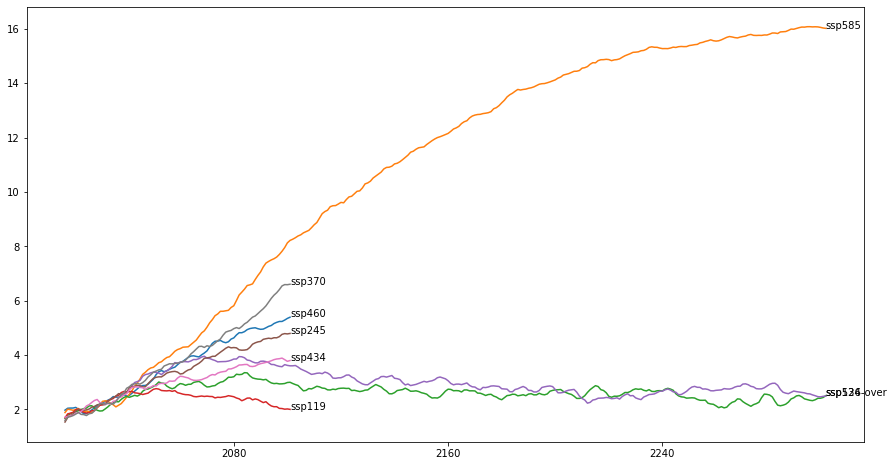

In [287]:
fig, ax = plt.subplots(figsize = (15,8))

for scenario in anom_stor.keys():
    
    anom = anom_stor[scenario]['anom']
    rolling = anom_stor[scenario]['rolling']
    
    
    
    pdata = rolling.tas
    time_vals  = pdata.time.values
    
    ax.plot(time_vals,pdata.values)
    ax.annotate(scenario, xy = (time_vals[-1], pdata[-1]))
    

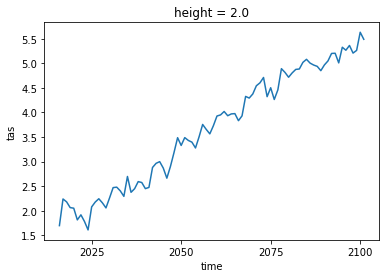

In [262]:
anom_stor['ssp460'].tas.plot()

In [39]:
test_anom = data_stor['ssp460'].resample(time = 'Y').mean()
test_anom = test_anom.mean(dim = ['lat','lon']) -  climatology
test_anom

<xarray.Dataset>
Dimensions:  (time: 86)
Coordinates:
  * time     (time) datetime64[ns] 2015-12-31 2016-12-31 ... 2100-12-31
    height   float64 2.0
Data variables:
    tas      (time) float32 1.698 2.24 2.182 2.065 ... 5.207 5.262 5.631 5.487

In [61]:
test_anom_rol = test_anom.rolling(time = 5 , min_periods = 2 , center = False).mean(dim = 'time')
test_anom_rol     

<xarray.Dataset>
Dimensions:  (time: 86)
Coordinates:
  * time     (time) datetime64[ns] 2015-12-31 2016-12-31 ... 2100-12-31
    height   float64 2.0
Data variables:
    tas      (time) float32 nan 1.969 2.04 2.046 ... 5.234 5.284 5.345 5.39

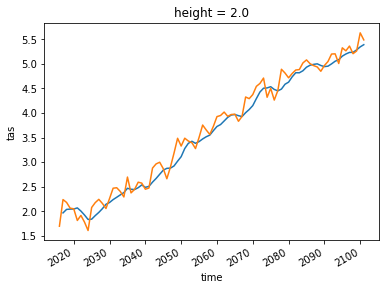

In [62]:
test_anom_rol.tas.plot()
test_anom.tas.plot()